In [1]:
import os
import speech_recognition as sr
from pydub import AudioSegment

def split_audio_by_words(audio_path):
    # Load the audio file
    audio = AudioSegment.from_wav(audio_path)

    # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Open the audio file
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)

    # Perform speech recognition on the audio
    result = recognizer.recognize_google(audio_data, language="ne-NP")

    # Split the recognized text into words
    words = result.split()

    # Get the audio duration in milliseconds
    audio_duration = len(audio)

    # Create a directory to save the split audio files
    output_dir = os.path.splitext(audio_path)[0] + "_split"
    os.makedirs(output_dir, exist_ok=True)
    print(words)
    # Split the audio based on word boundaries
    for i, word in enumerate(words):
        start_time = int(audio_duration / len(words) * i)
        end_time = int(audio_duration / len(words) * (i + 1))
        split_audio_path = os.path.join(output_dir, f"{i+1}_{word}.wav")

        # Extract the segment of audio
        split_audio = audio[start_time:end_time]

        # Save the split audio to a file
        split_audio.export(split_audio_path, format="wav")

        print(f"Split audio {split_audio_path} created.")
        print(f"Start Time{start_time} End Time{end_time}")
        

    print("Audio splitting completed.")

# Provide the path to the audio file
audio_path = "yoyo.wav"

# Split the audio file by words
split_audio_by_words(audio_path)


c:\Users\baral\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


['मेरो', 'नाम', 'sourav', 'baral', 'हो', 'तपाईंको', 'खबरमा', 'hai', 'yo', 'mero', 'nam', 'sourav', 'baral', 'तपाईं', 'yo', 'mero', 'aauychu', 'love', 'त्यो', 'मेरो', 'नाम', 'saurav', 'बरालको', 'तपाईंको', 'खबर', 'के', 'छ', 'club']
Split audio yoyo_split\1_मेरो.wav created.
Start Time0 End Time4099
Split audio yoyo_split\2_नाम.wav created.
Start Time4099 End Time8199
Split audio yoyo_split\3_sourav.wav created.
Start Time8199 End Time12299
Split audio yoyo_split\4_baral.wav created.
Start Time12299 End Time16399
Split audio yoyo_split\5_हो.wav created.
Start Time16399 End Time20499
Split audio yoyo_split\6_तपाईंको.wav created.
Start Time20499 End Time24598
Split audio yoyo_split\7_खबरमा.wav created.
Start Time24598 End Time28698
Split audio yoyo_split\8_hai.wav created.
Start Time28698 End Time32798
Split audio yoyo_split\9_yo.wav created.
Start Time32798 End Time36898
Split audio yoyo_split\10_mero.wav created.
Start Time36898 End Time40998
Split audio yoyo_split\11_nam.wav created.
Sta

In [ ]:
words

In [2]:
import speech_recognition as sr
import wave

def detect_words(audio_file):
    """Detects words in an audio file and returns the time intervals for each word."""
    r = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio = r.record(source)

    try:
        text = r.recognize_google(audio)
    except sr.UnknownValueError:
        return None

    word_times = []
    words = text.split()

    with wave.open(audio_file, "rb") as wave_file:
        frame_rate = wave_file.getframerate()
        audio_duration = wave_file.getnframes() / frame_rate
        word_duration = audio_duration / len(words)

    for i, word in enumerate(words):
        start_time = i * word_duration
        end_time = (i + 1) * word_duration
        word_times.append((word, start_time, end_time))

    return word_times

if __name__ == "__main__":
    audio_file = "yoyo.wav"
    word_times = detect_words(audio_file)
    if word_times is None:
        print("No words detected.")
    else:
        for word, start_time, end_time in word_times:
            print(f"Word: {word}, Start Time: {start_time:.2f} seconds, End Time: {end_time:.2f} seconds")


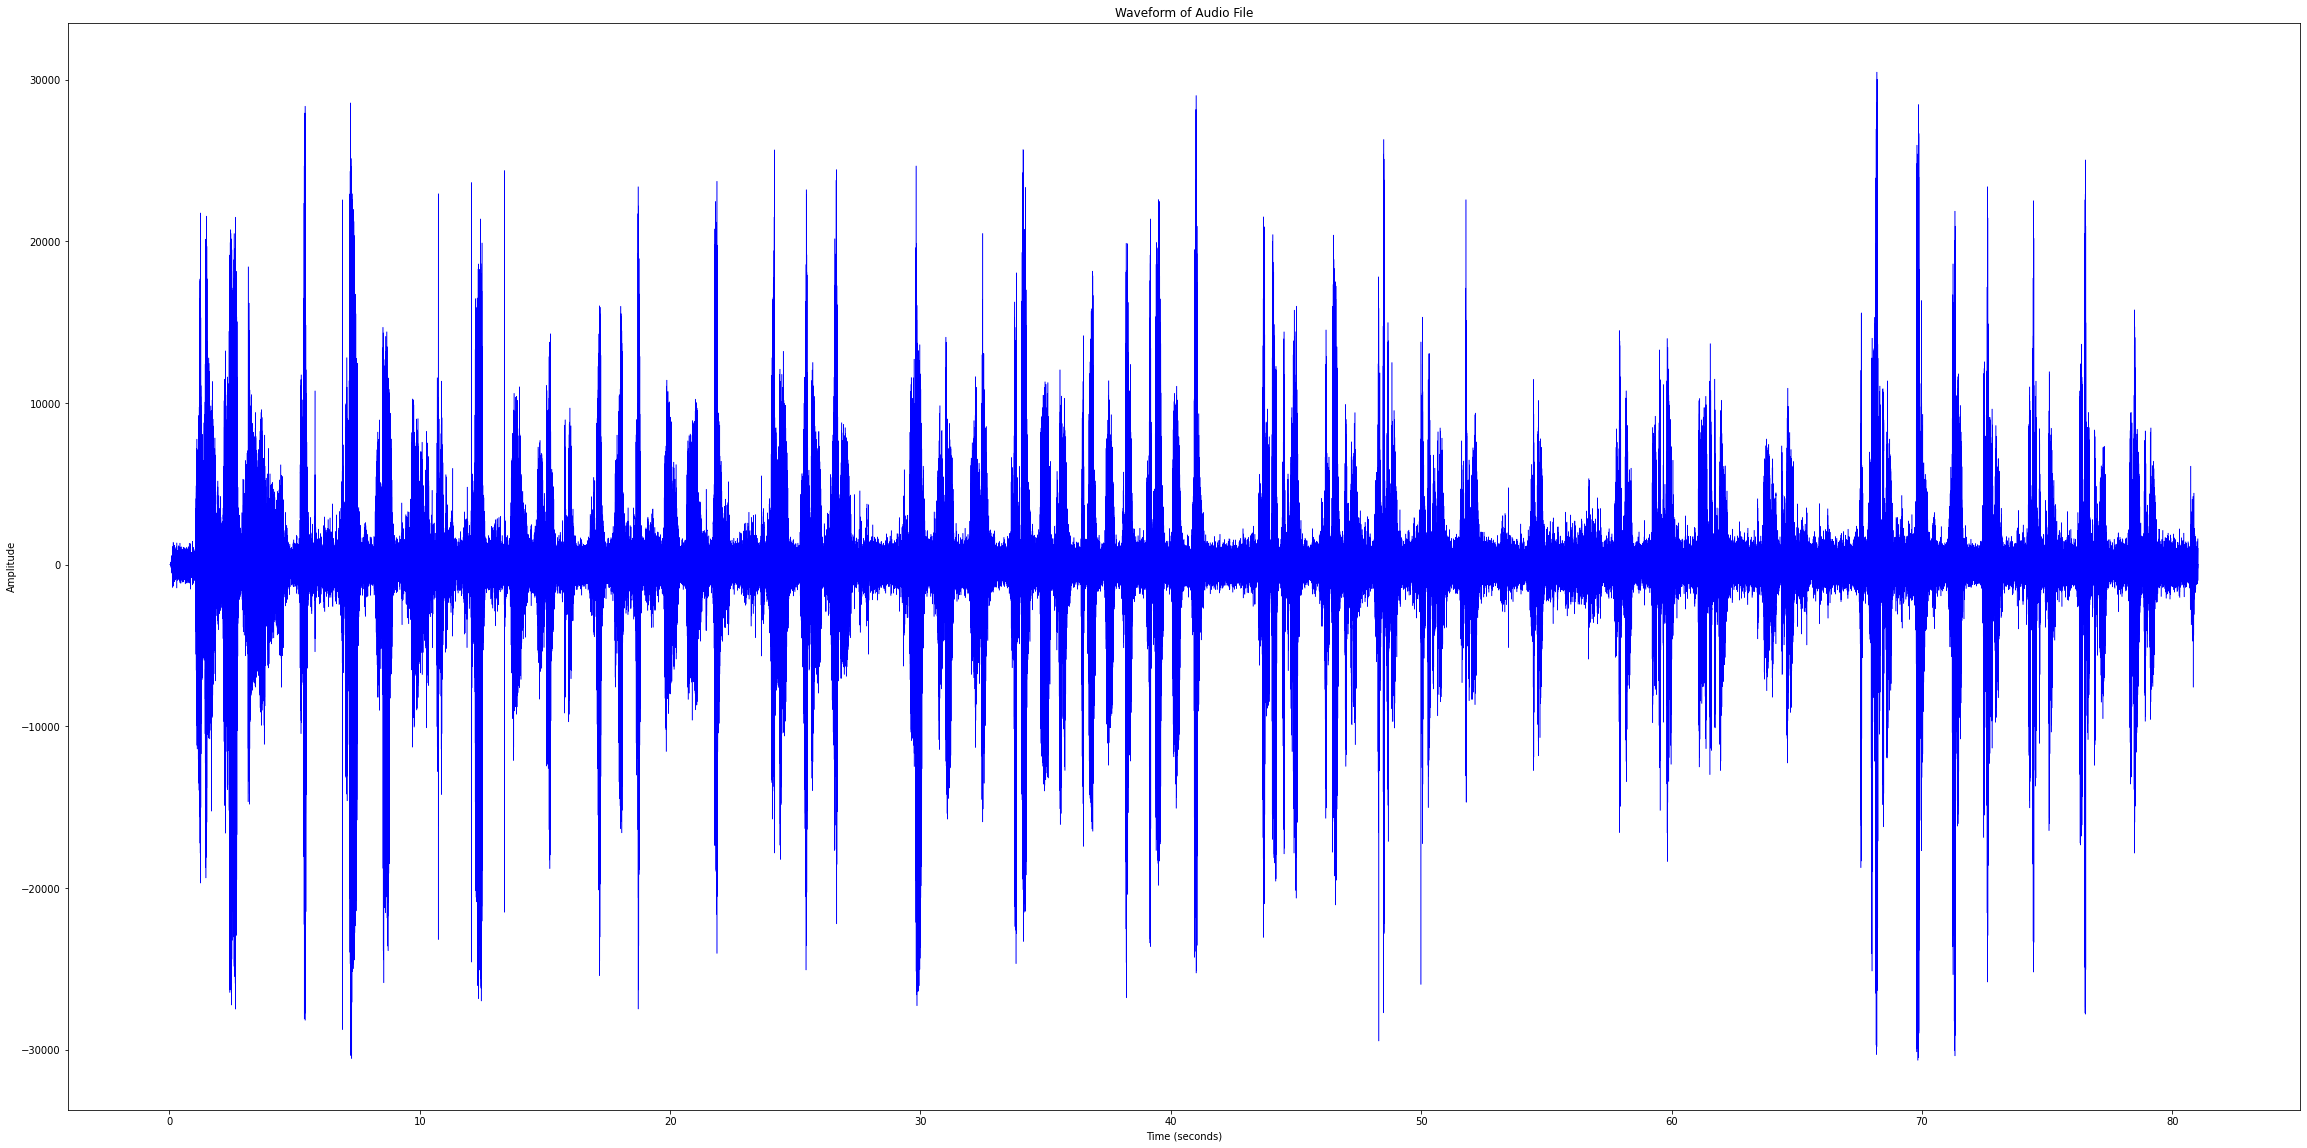

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

def display_waveform(audio_file):
    """Displays the waveforms of an audio file."""
    with wave.open(audio_file, "rb") as wave_file:
        frames = wave_file.readframes(-1)
        signal = np.frombuffer(frames, dtype="int16")
        frame_rate = wave_file.getframerate()
        duration = len(signal) / frame_rate

    time = np.linspace(0, duration, num=len(signal))

    plt.figure(figsize=(40, 20))
    plt.plot(time, signal, color="blue", linewidth=0.5)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform of Audio File")
    plt.show()

if __name__ == "__main__":
    audio_file = "friends.wav"
    display_waveform(audio_file)


In [3]:
import speech_recognition as sr
from pydub import AudioSegment

def transcribe_audio(audio_file):
    """Transcribes the audio file and returns the recognized words with their time intervals."""
    r = sr.Recognizer()
    
    audio = AudioSegment.from_wav(audio_file)
    duration = len(audio) / 1000  # Duration in seconds

    word_times = []
    
    with sr.AudioFile(audio_file) as source:
        audio_data = r.record(source)
        try:
            words = r.recognize_google(audio_data, show_all=True)
        except sr.UnknownValueError:
            return None

        if "alternative" in words:
            alternatives = words["alternative"]
            word_count = len(alternatives[0]["transcript"].split())
            segment_duration = duration / word_count

            for i, alternative in enumerate(alternatives):
                word = alternative["transcript"]
                start_time = i * segment_duration
                end_time = (i + 1) * segment_duration
                word_times.append((word, start_time, end_time))

    return word_times

if __name__ == "__main__":
    audio_file = "friends.wav"
    recognized_words = transcribe_audio(audio_file)
    
    if recognized_words is None:
        print("No words recognized.")
    else:
        for word, start_time, end_time in recognized_words:
            print(f"Word: {word}, Start Time: {start_time:.2f} seconds, End Time: {end_time:.2f} seconds")


Word: Roshan Sulabh University result, Start Time: 0.00 seconds, End Time: 20.26 seconds
Word: Raushan Sulabh University result, Start Time: 20.26 seconds, End Time: 40.52 seconds
Word: Roshan sulbh University result, Start Time: 40.52 seconds, End Time: 60.78 seconds
Word: Roshen Sulabh University result, Start Time: 60.78 seconds, End Time: 81.05 seconds
Word: roushan Sulabh University result, Start Time: 81.05 seconds, End Time: 101.31 seconds


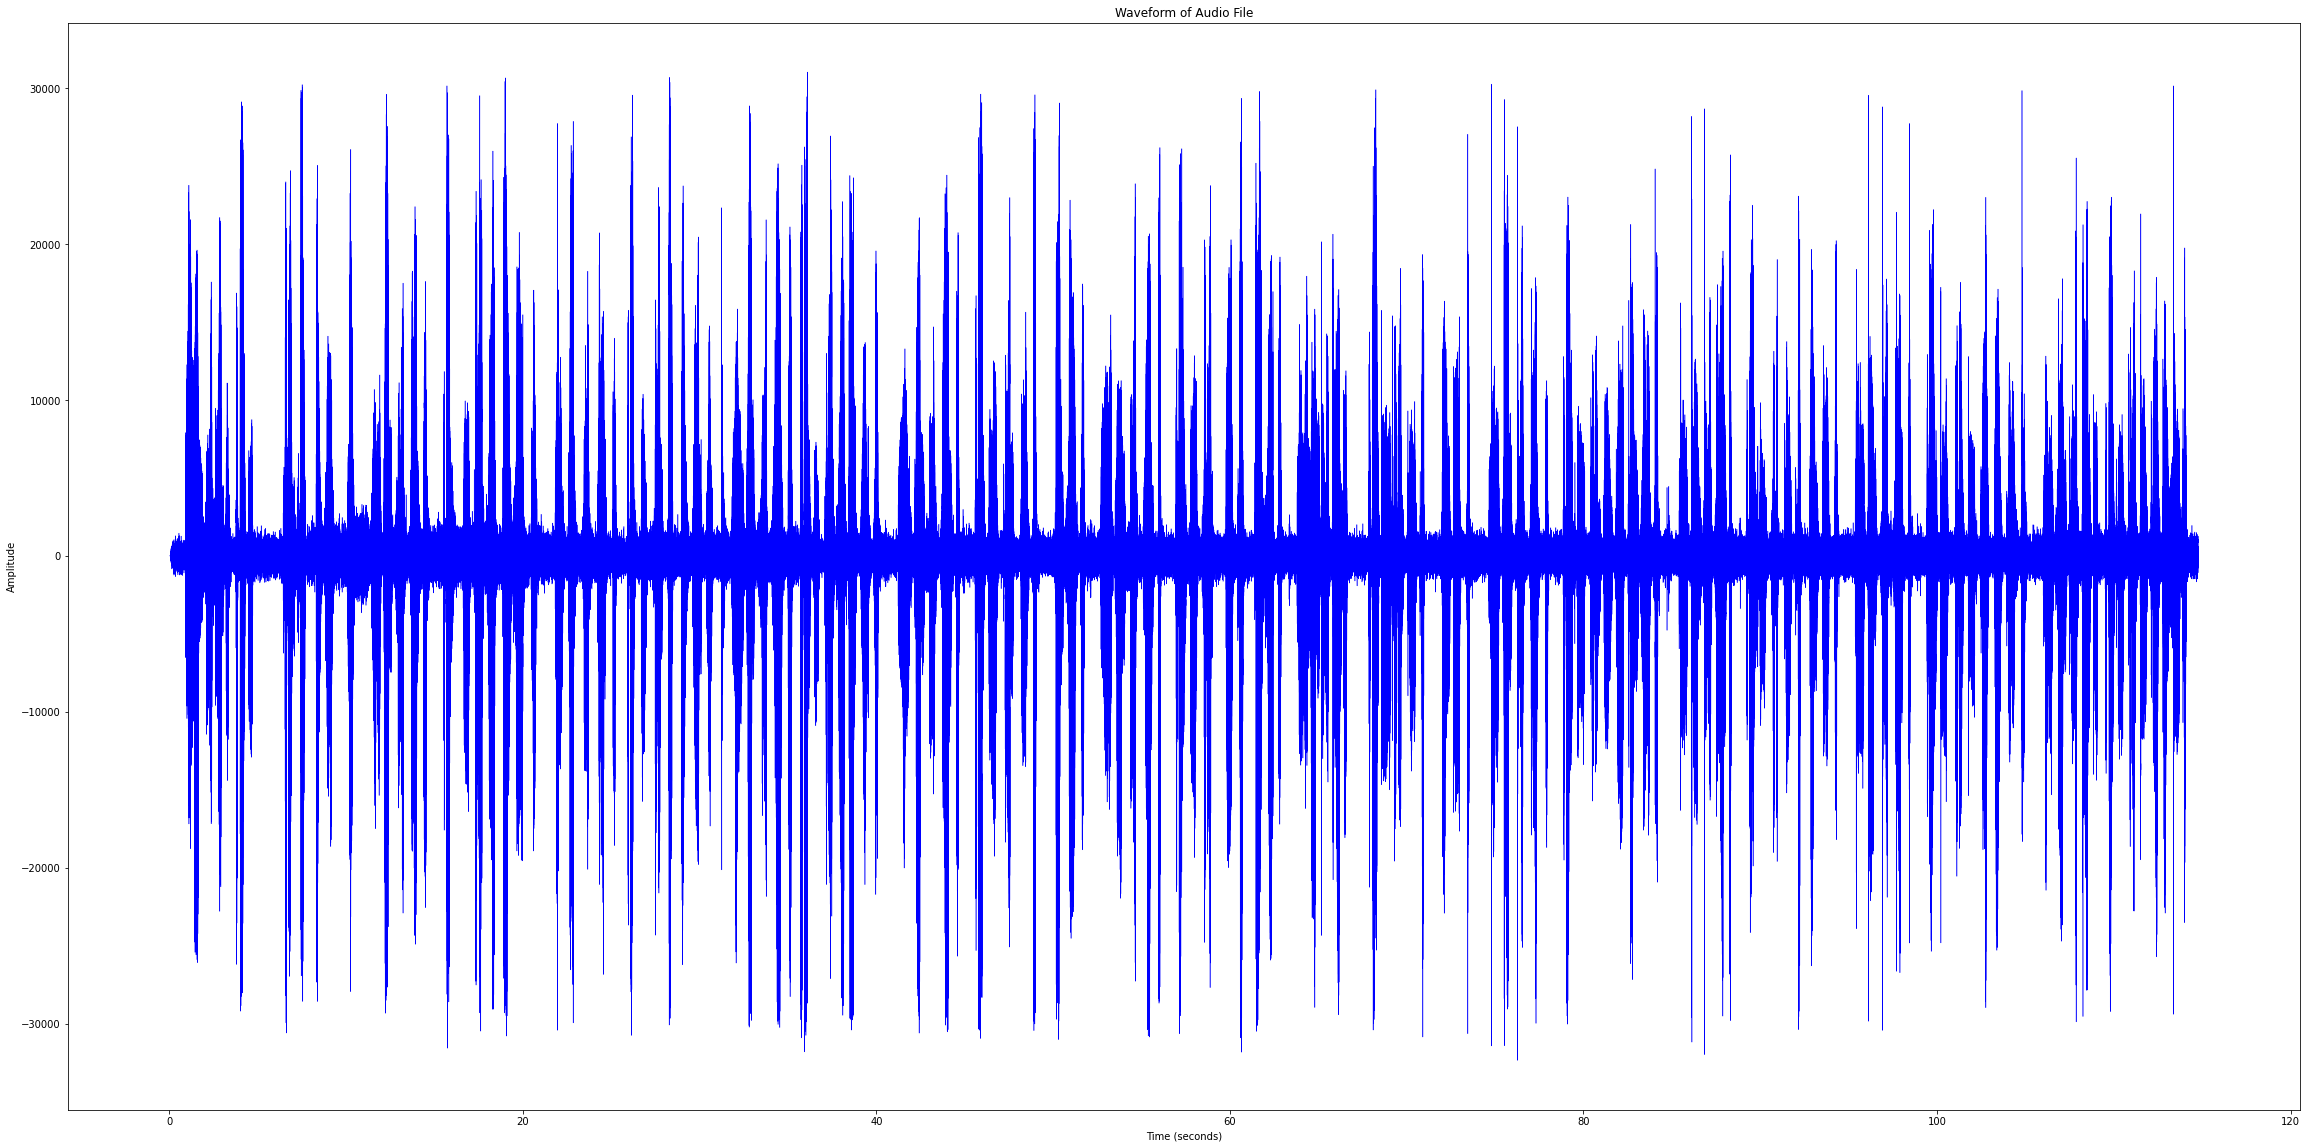

Word: mera	Interval: 0.00s - 2.67s
Word: naam	Interval: 2.67s - 5.34s
Word: Saurabh	Interval: 5.34s - 8.01s
Word: Braille	Interval: 8.01s - 10.68s
Word: Ho	Interval: 10.68s - 13.35s
Word: tapai	Interval: 13.35s - 16.02s
Word: Ko	Interval: 16.02s - 18.69s
Word: Khabar	Interval: 18.69s - 21.36s
Word: Chha	Interval: 21.36s - 24.03s
Word: I	Interval: 24.03s - 26.70s
Word: love	Interval: 26.70s - 29.37s
Word: you	Interval: 29.37s - 32.04s
Word: Mero	Interval: 32.04s - 34.71s
Word: Naam	Interval: 34.71s - 37.38s
Word: Saurabh	Interval: 37.38s - 40.04s
Word: Baral	Interval: 40.04s - 42.71s
Word: home	Interval: 42.71s - 45.38s
Word: The	Interval: 45.38s - 48.05s
Word: Pi	Interval: 48.05s - 50.72s
Word: Ko	Interval: 50.72s - 53.39s
Word: Khabar	Interval: 53.39s - 56.06s
Word: I	Interval: 56.06s - 58.73s
Word: love	Interval: 58.73s - 61.40s
Word: you	Interval: 61.40s - 64.07s
Word: Mero	Interval: 64.07s - 66.74s
Word: Naam	Interval: 66.74s - 69.41s
Word: Saurabh	Interval: 69.41s - 72.08s
Word: B

In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr

def display_waveform(audio_file):
    """Displays the waveforms of an audio file."""
    with wave.open(audio_file, "rb") as wave_file:
        frames = wave_file.readframes(-1)
        signal = np.frombuffer(frames, dtype="int16")
        frame_rate = wave_file.getframerate()
        duration = len(signal) / frame_rate

    time = np.linspace(0, duration, num=len(signal))

    plt.figure(figsize=(40, 20))
    plt.plot(time, signal, color="blue", linewidth=0.5)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform of Audio File")
    plt.show()

    # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Open the audio file
    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)

    # Perform speech recognition on the audio
    try:
        # Get the transcribed text
        transcribed_text = recognizer.recognize_google(audio_data)

        # Split the transcribed text into individual words
        words = transcribed_text.split()

        # Calculate the time interval for each word
        word_duration = duration / len(words)
        word_intervals = [(i * word_duration, (i + 1) * word_duration) for i in range(len(words))]

        # Print each word and its time interval
        for word, interval in zip(words, word_intervals):
            print(f"Word: {word}\tInterval: {interval[0]:.2f}s - {interval[1]:.2f}s")

    except sr.UnknownValueError:
        print("Speech recognition could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from speech recognition service: {e}")

if __name__ == "__main__":
    audio_file = "yoyo.wav"
    display_waveform(audio_file)
